<a href="https://colab.research.google.com/github/ramkiramanathan/Customer_Retaining/blob/main/Customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the neccessary libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.combine import SMOTEENN
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix

## Importing the data

In [56]:
df = pd.read_csv('/content/data_regression.csv')

## Overview of the data

In [57]:
df.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [58]:
df.describe()

,year,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
count,2000.0,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1972.000000,2000.000000,1965.000000
mean,2015.0,554887.157500,38.69050,99.750000,270.178425,10.198700,30.620780,100.415500,4.482500,3.250507,1.547000,0.133333
std,0.0,261033.690318,10.20641,39.755386,80.551627,2.785519,9.129165,19.529454,2.487728,0.809084,1.315164,0.340021
min,2015.0,100198.000000,18.00000,1.000000,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,328634.750000,32.00000,73.000000,218.212500,8.400000,24.735000,87.000000,3.000000,3.000000,1.000000,0.000000
50%,2015.0,567957.500000,37.00000,99.000000,269.925000,10.200000,30.590000,101.000000,4.000000,3.000000,1.000000,0.000000
75%,2015.0,773280.250000,44.00000,127.000000,324.675000,12.000000,36.797500,114.000000,6.000000,4.000000,2.000000,0.000000
max,2015.0,999961.000000,82.00000,243.000000,526.200000,20.000000,59.640000,175.000000,19.000000,6.000000,9.000000,1.000000


## Checking the null values in the data

In [59]:
df.isnull().sum()

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [60]:
df.shape

(2000, 16)

## Checking for duplicates

In [61]:
df.drop_duplicates()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


In [62]:
df.shape

(2000, 16)

In [63]:
df.columns

Index(['year', 'customer_id', 'phone_no', 'gender', 'age',
       'no_of_days_subscribed', 'multi_screen', 'mail_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn'],
      dtype='object')

## Droping the column which are not seems to be neccessary

In [64]:
df.drop(columns = ['year', 'customer_id', 'phone_no'])

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


## Heatmap to visualize the null values

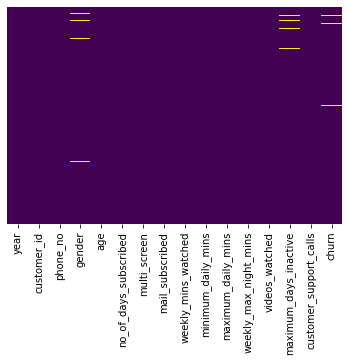

In [65]:
sns.heatmap(df.isnull(),yticklabels = False,cbar = False,cmap = 'viridis')

## Filling the missing values in gender column

In [66]:
df['gender'].value_counts()

Male      1053
Female     923
Name: gender, dtype: int64

In [67]:
df.loc[df['gender'].isnull()]

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
5,2015,101953,329-6603,NaN,31,65,no,no,193.65,12.7,21.95,111,6,4.0,4,1.0
6,2015,103051,416-1845,NaN,54,59,no,no,239.25,10.2,27.12,106,4,NaN,0,0.0
20,2015,107962,356-7217,NaN,57,104,no,no,246.30,10.7,27.91,117,8,3.0,1,0.0
21,2015,108471,366-4444,NaN,32,170,no,no,369.60,9.1,41.89,95,8,3.0,0,0.0
38,2015,113990,331-5919,NaN,48,56,no,no,205.80,14.3,23.32,72,4,4.0,1,0.0
64,2015,121406,373-7690,NaN,36,55,no,yes,283.95,12.5,32.18,102,4,4.0,2,0.0
88,2015,131549,404-4486,NaN,39,163,no,no,183.60,12.5,20.81,97,7,4.0,1,0.0
107,2015,141174,398-8385,NaN,39,72,no,no,379.50,9.8,43.01,89,4,3.0,0,0.0
128,2015,152306,402-3599,NaN,26,64,no,yes,301.95,12.3,34.22,127,3,NaN,1,0.0
152,2015,164455,334-2577,NaN,46,95,no,no,357.15,11.8,40.48,115,4,4.0,4,0.0


In [68]:
df.gender.fillna(df.gender.mode()[0],inplace = True)

In [69]:
df.gender.isnull().sum()

0

## Filling the missing values in maximum_days_inactive column

In [70]:
df.dtypes

year                        int64
customer_id                 int64
phone_no                   object
gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object

In [71]:
df.maximum_days_inactive.value_counts()

3.0    945
4.0    645
2.0    273
5.0     85
1.0     12
0.0     10
6.0      2
Name: maximum_days_inactive, dtype: int64

In [72]:
df.maximum_days_inactive.fillna(int(df.maximum_days_inactive.mean()),inplace = True)

In [73]:
df.maximum_days_inactive.value_counts()

3.0    973
4.0    645
2.0    273
5.0     85
1.0     12
0.0     10
6.0      2
Name: maximum_days_inactive, dtype: int64

In [74]:
df.isnull().sum()

year                       0
customer_id                0
phone_no                   0
gender                     0
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive      0
customer_support_calls     0
churn                     35
dtype: int64

## Dropping the rows which has null values in churn column

In [75]:
df = df.dropna()

In [76]:
df.isnull().sum()

year                      0
customer_id               0
phone_no                  0
gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64

In [77]:
df.shape

(1965, 16)

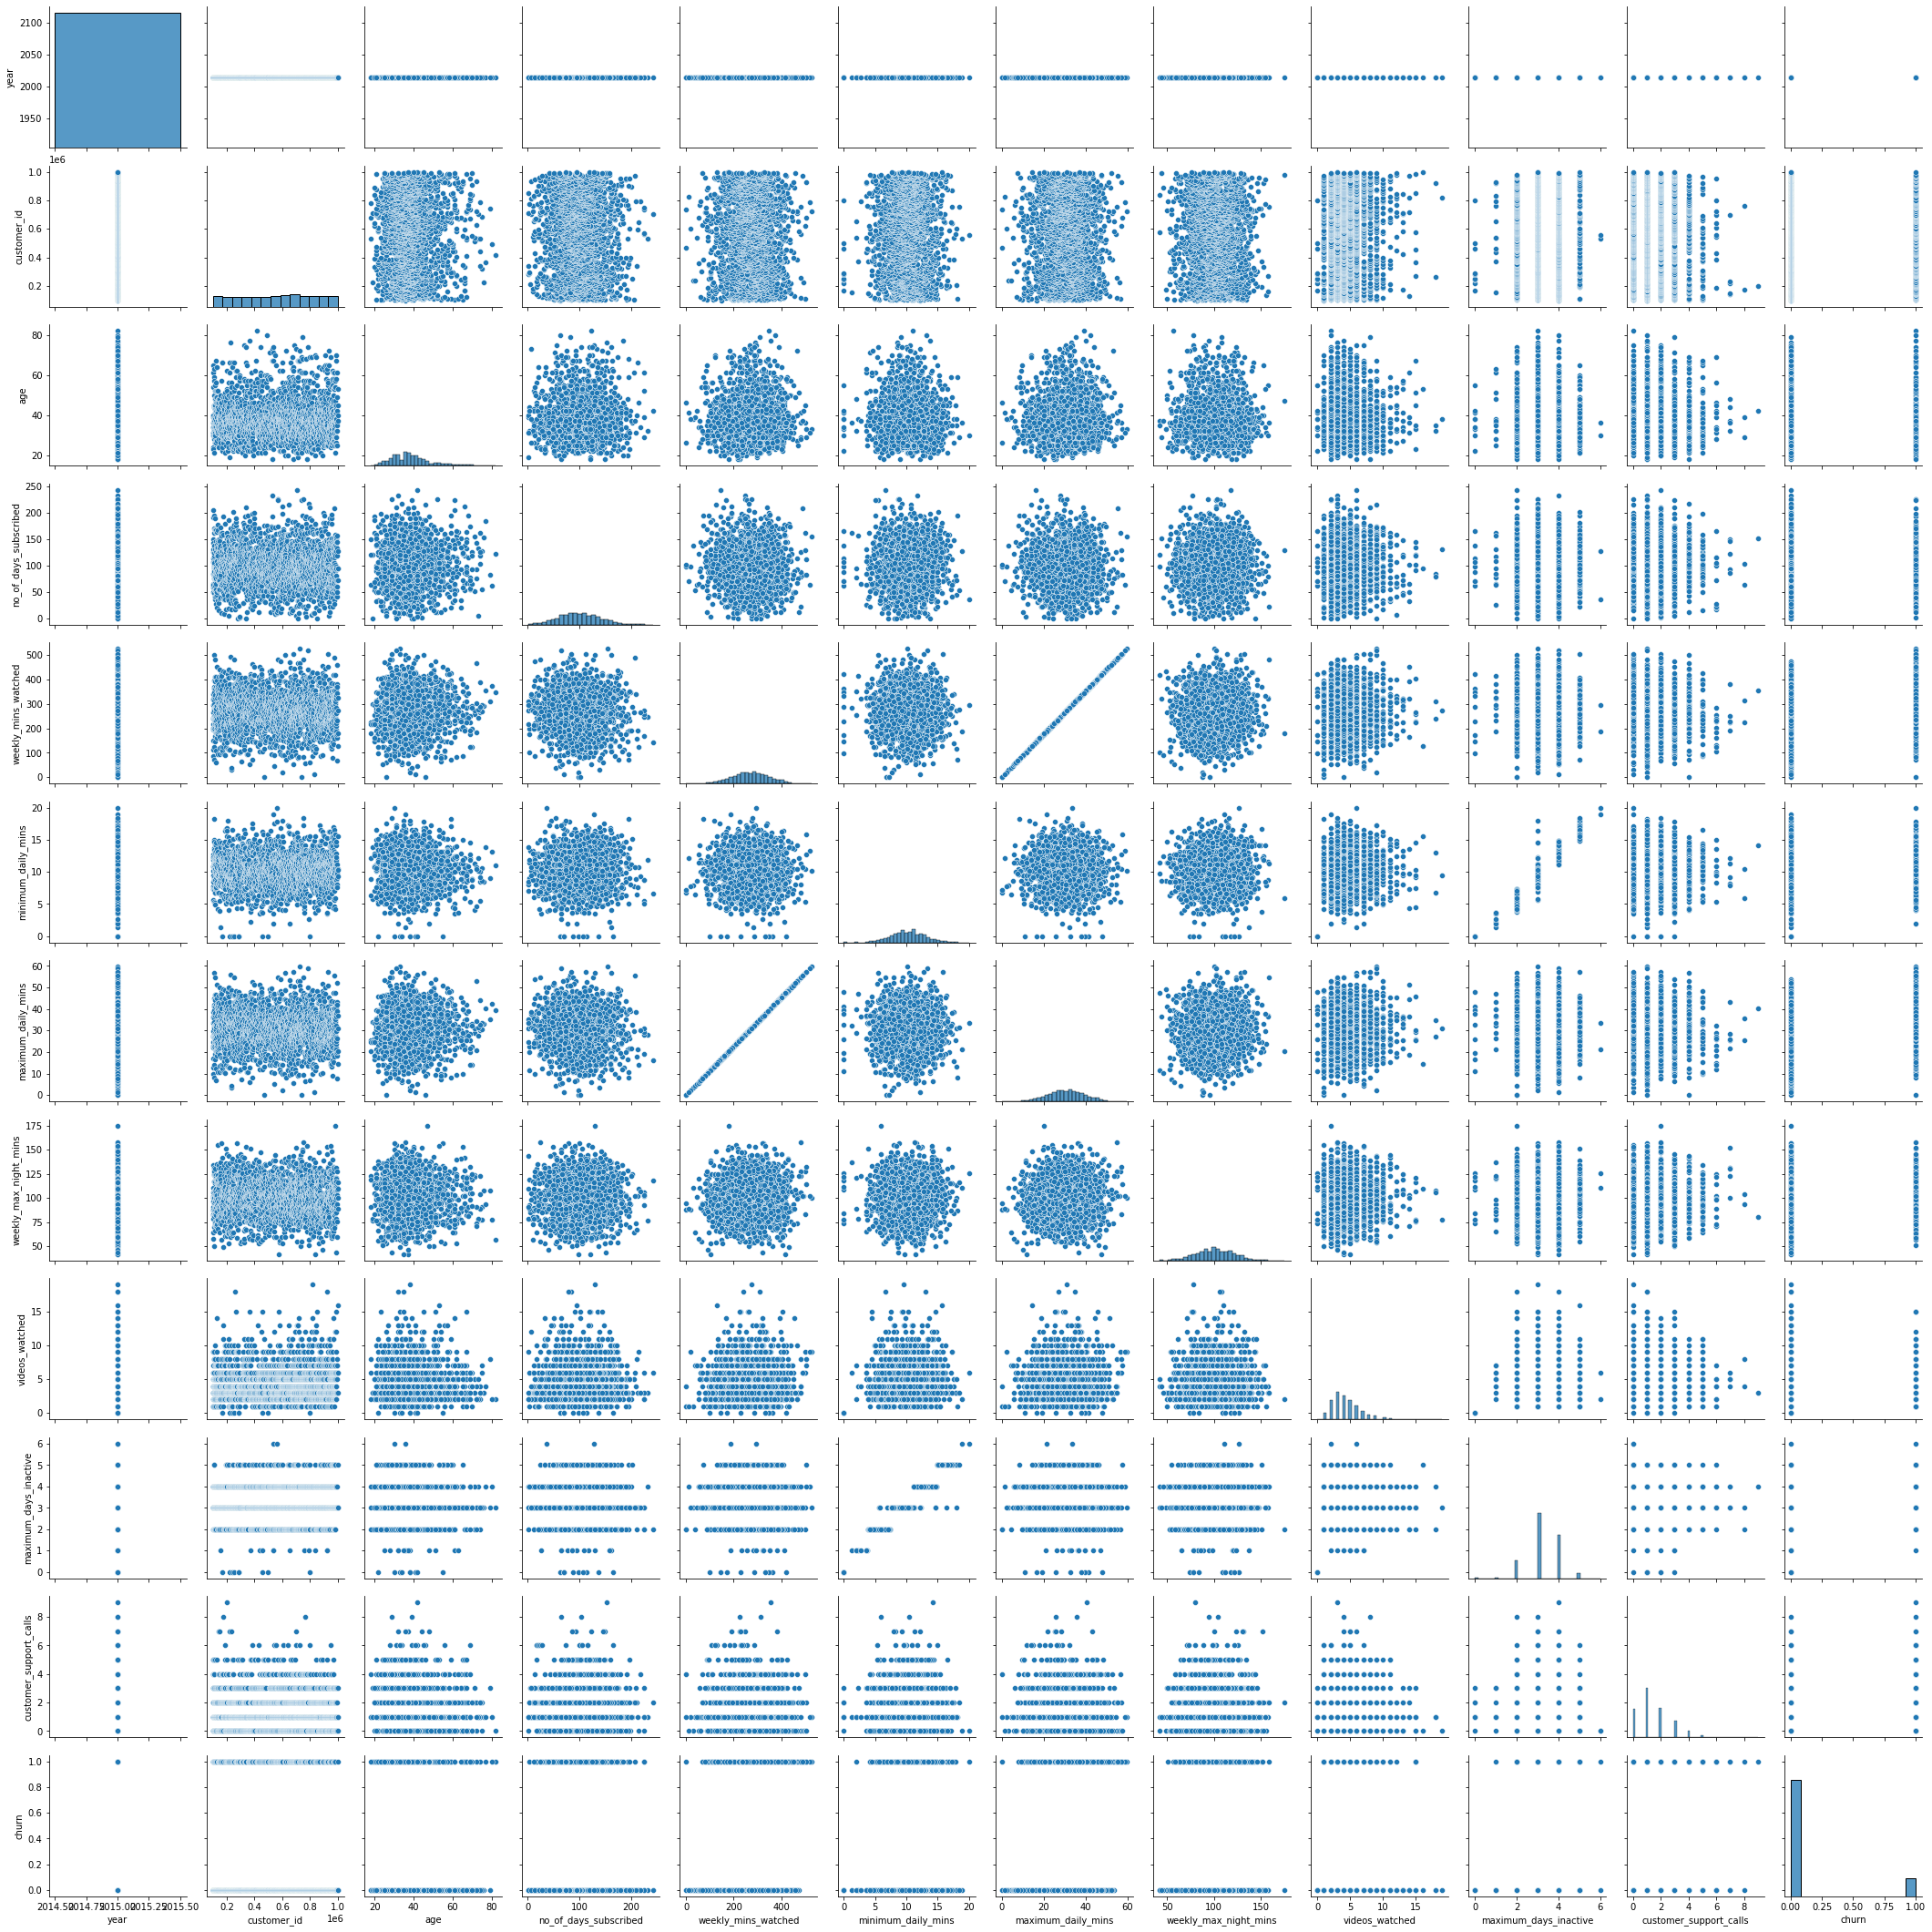

In [78]:
sns.pairplot(df)

## Checking whether the data is skeewed

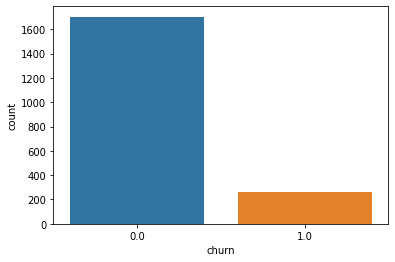

In [79]:
sns.countplot(x= 'churn', data = df)

In [80]:
df.churn.value_counts()

0.0    1703
1.0     262
Name: churn, dtype: int64

In [81]:
df.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [82]:
df.dtypes

year                        int64
customer_id                 int64
phone_no                   object
gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object

## Droping the unique column

In [83]:
df = df.drop(columns = ['year','customer_id','phone_no'])
df.head()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [84]:
df['gender'] = df.gender.map({'Female':0,'Male':1})
df['multi_screen'] = df.multi_screen.map({'no':0,'yes':1})
df['mail_subscribed'] = df.mail_subscribed.map({'no':0,'yes':1})

In [85]:
df.head()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,0,36,62,0,0,148.35,12.2,16.81,82,1,4.0,1,0.0
1,0,39,149,0,0,294.45,7.7,33.37,87,3,3.0,2,0.0
2,0,65,126,0,0,87.30,11.9,9.89,91,1,4.0,5,1.0
3,0,24,131,0,1,321.30,9.5,36.41,102,4,3.0,3,0.0
4,0,40,191,0,0,243.00,10.9,27.54,83,7,3.0,1,0.0


In [86]:
df.dtypes

gender                      int64
age                         int64
no_of_days_subscribed       int64
multi_screen                int64
mail_subscribed             int64
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object

## The data looks imbalanced,Lets balance it

## Splitting of the data

##SMOTE+ENN

In [119]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
smt = SMOTEENN(sampling_strategy='all')
X_smt, y_smt = smt.fit_resample(X_train, Y_train)

In [120]:
np.unique(y_smt, return_counts=True)

(array([0., 1.]), array([ 736, 1140]))

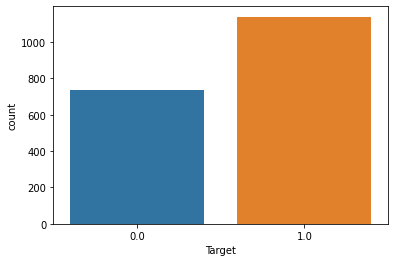

In [121]:
c = pd.DataFrame(y_smt,columns = ['Target'])
sns.countplot(x= 'Target', data = c)

## Decision Tree Algorithm

In [89]:
for depth in [1,2,3,4,5,6,7,8,9,10,20,22,25,30,35]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_smt, y_smt) # the model is trained
  trainAccuracy = accuracy_score(y_smt, dt.predict(X_smt)) # this is useless information - i am showing to prove a point
  #dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X_smt, y_smt, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))


Depth  :  1  Training Accuracy :  0.6596617119425935  Cross val score :  0.6597095761381476
Depth  :  2  Training Accuracy :  0.7780625320348539  Cross val score :  0.776046572475144
Depth  :  3  Training Accuracy :  0.8657098923628909  Cross val score :  0.854997383568812
Depth  :  4  Training Accuracy :  0.8800615069195284  Cross val score :  0.8703453689167976
Depth  :  5  Training Accuracy :  0.9267042542286007  Cross val score :  0.8980324437467295
Depth  :  6  Training Accuracy :  0.9308047155304972  Cross val score :  0.9082888540031397
Depth  :  7  Training Accuracy :  0.9431060994361866  Cross val score :  0.9087990580847723
Depth  :  8  Training Accuracy :  0.9574577139928242  Cross val score :  0.9231475667189952
Depth  :  9  Training Accuracy :  0.9630958482829318  Cross val score :  0.9205913134484562
Depth  :  10  Training Accuracy :  0.97385955920041  Cross val score :  0.9216064887493459
Depth  :  20  Training Accuracy :  1.0  Cross val score :  0.9231449502878075
Depth

In [90]:
columns = []
for i in df.columns:
  columns.append(i)
columns.pop()
columns
s = pd.DataFrame(list(zip(columns,dt.feature_importances_*100)),columns= ['columns','Importances'])
s.sort_values(by = ['Importances'],ascending = False,inplace = True)
s = s.loc[s['Importances'] > 1]
s

,columns,Importances
7,maximum_daily_mins,21.749541
3,multi_screen,20.855543
11,customer_support_calls,19.846332
0,gender,10.772853
5,weekly_mins_watched,4.909479
2,no_of_days_subscribed,4.793144
9,videos_watched,4.699343
10,maximum_days_inactive,4.491584
1,age,3.617874
8,weekly_max_night_mins,2.160315


In [91]:
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(X_smt, y_smt)
y_pred=dt.predict(X_test)
roc_auc_score(Y_test,y_pred)

0.7818069027746447

In [92]:
confusion_matrix(Y_test,y_pred)

array([[284,  57],
       [ 14,  38]])

In [93]:
new_cols = []
for i in s['columns']:
  new_cols.append(i)
new_cols

['maximum_daily_mins',
 'multi_screen',
 'customer_support_calls',
 'gender',
 'weekly_mins_watched',
 'no_of_days_subscribed',
 'videos_watched',
 'maximum_days_inactive',
 'age',
 'weekly_max_night_mins',
 'minimum_daily_mins']

## After feature importance

In [94]:
X = df.loc[:,new_cols].values
Y = df.iloc[:,-1].values
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,stratify = Y,test_size=0.2)
smt = SMOTEENN(sampling_strategy='all')
X_smt, y_smt = smt.fit_resample(X_train, Y_train)

In [95]:
dt = DecisionTreeClassifier(max_depth=8)
dt.fit(X_smt, y_smt)
y_pred=dt.predict(X_test)
roc_auc_score(Y_test,y_pred)

0.781637717121588

In [96]:
confusion_matrix(Y_test,y_pred)

array([[297,  44],
       [ 16,  36]])

In [97]:
len(list(df.columns))

13

## Random Forest Algorithm

In [98]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators= 100, max_depth = 4, max_features='sqrt')


rf.fit(X_smt, y_smt)

# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)
roc_auc_score(Y_test,y_pred)

0.8121193322806226

In [99]:
rf.feature_importances_

array([0.16994083, 0.27491554, 0.16765221, 0.04889564, 0.16890067,
       0.02102804, 0.01804256, 0.08625585, 0.01356642, 0.01060911,
       0.02019313])

## XGBoost

In [100]:
# for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
#   model = XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
#   model.fit(X_smt,y_smt) #train the model
#   print("Learning rate : ", lr, " Train score : ", model.score(X_smt,y_smt), " Cross-Val score : ", np.mean(cross_val_score(model, X_smt,y_smt, cv=10)))

In [101]:
# model = XGBClassifier(learning_rate = 0.01, n_estimators=100, verbosity = 0) # initialise the model
# model.fit(X_smt,y_smt) #train the model
# y_pred = model.predict(X_test)
# print(roc_auc_score(Y_test,y_pred))

## KNN Algorithm

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
scaler = StandardScaler()
scaler.fit(X_smt)
X_train_scaled = scaler.transform(X_smt)
X_test_scaled = scaler.transform(X_test)
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_train_scaled,y_smt) # training the model
  print("K value  : " , i, " train score : ", knn.score(X_train_scaled,y_smt) , " score : ", np.mean(cross_val_score(knn, X_train_scaled,y_smt, cv=10))) #predicting using the model
  knn = KNeighborsClassifier(6) #initialising the model
knn.fit(X_train_scaled,y_smt) # training the model
y_pred = knn.predict(scaler.transform(X_test))
print(roc_auc_score(Y_test,y_pred))


K value  :  1  train score :  1.0  score :  0.9467336146573366
K value  :  2  train score :  0.9984480082772892  score :  0.946741627049837
K value  :  3  train score :  0.958613554061045  score :  0.9182949628759147
K value  :  4  train score :  0.9606828763579928  score :  0.9224346990011216
K value  :  5  train score :  0.9389549922400414  score :  0.9058917792852945
K value  :  6  train score :  0.9410243145369891  score :  0.9048742054377437
K value  :  7  train score :  0.9213657527159855  score :  0.8888147000694409
K value  :  8  train score :  0.9275737196068288  score :  0.8960712568773035
K value  :  9  train score :  0.9094671495085359  score :  0.8841568292292079
K value  :  10  train score :  0.9208484221417486  score :  0.8919288499545963
K value  :  20  train score :  0.8851526125193999  score :  0.8608808290155439
K value  :  50  train score :  0.8442834971546819  score :  0.8355216067517761
0.7282032483645388


## Applying Voting Classifier

In [107]:
from sklearn.ensemble import VotingClassifier # this is the function that ensembles my model

model1 = DecisionTreeClassifier(max_depth=10)
model2 = RandomForestClassifier(n_estimators= 100, max_depth = 4, max_features='sqrt')
model3 = KNeighborsClassifier(6)
model = VotingClassifier(estimators=[('dt', model1), ('rf', model2),('knn',model3)],voting = 'soft') # it will stitich all the models together, voting = hard means max voting 
model.fit(X_smt,y_smt)
y_pred = model.predict(X_test)
print(roc_auc_score(Y_test,y_pred))

0.8127678772840062
